In [1]:
# import libraries and modules
import os
import glob
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
# set the working directory:
os.chdir('C:/Users/daphn/dsi-sg/DSIF-SG-9-private/project_4/data/clusters')

In [4]:
# list all the csv files in the directory:
extension = 'csv'
file_list = [i for i in glob.glob('*.{}'.format(extension))]

In [12]:
# init a dataframe to house all csv files:
df_cluster=pd.DataFrame()

# read all the csv files, add column names and combine them into one dataframe:
for f in file_list:
    df_dengue = pd.read_csv(f)
    df_dengue.columns = ['no_cases', 'street', 'latitude', 'longitude', 'cluster_sn', 'recent_2wk', 'total_cases','date', 'mth']
    df_cluster = pd.concat(objs =[df_cluster,df_dengue],axis=0)

Number Of Cases | Number of reported dengue cases at this location

Street Address | Street address where dengue cases are reported (down to the apartment block level)

Latitude | Latitude of the street address

Longitude | Longitude of the street address

Cluster Number | Every dengue cluster is labelled with a serial number. However, this serial number cannot be used as an unique identifier because (1) the serial number is reused in other snapshots and (2) the serial number will change throughout the cluster's lifetime.

Recent Cases In Cluster** | Number of dengue cases with onset in the last 2 weeks

Total Cases In Cluster | Total number of dengue cases reported in this cluster

Date | Date string in YYMMDD format

Month Number | Index number of the month, where 1=January and 12=December

**NEA published the count of recent cases per cluster only from December 2013 onwards. For prior data, this field is substituted with a placeholder value of -1.

In [13]:
df_cluster.shape

(73606, 9)

In [14]:
df_cluster.head()

,no_cases,street,latitude,longitude,cluster_sn,recent_2wk,total_cases,date,mth
0,4,tampines avenue 5 (block 860),1.355432,103.937808,1,-1,119,130523,5
1,1,tampines avenue 5 (block 860b),1.355421,103.937119,1,-1,119,130523,5
2,5,tampines avenue 5 (block 861),1.355118,103.937242,1,-1,119,130523,5
3,1,tampines avenue 5 (block 861a),1.354666,103.937225,1,-1,119,130523,5
4,2,tampines avenue 8,1.352493,103.930397,1,-1,119,130523,5


In [15]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73606 entries, 0 to 620
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   no_cases     73606 non-null  int64  
 1   street       73606 non-null  object 
 2   latitude     73606 non-null  float64
 3   longitude    73606 non-null  float64
 4   cluster_sn   73606 non-null  int64  
 5   recent_2wk   73606 non-null  int64  
 6   total_cases  73606 non-null  int64  
 7   date         73606 non-null  int64  
 8   mth          73606 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 5.6+ MB


In [16]:
df_test = df_cluster[df_cluster['date']==130523]

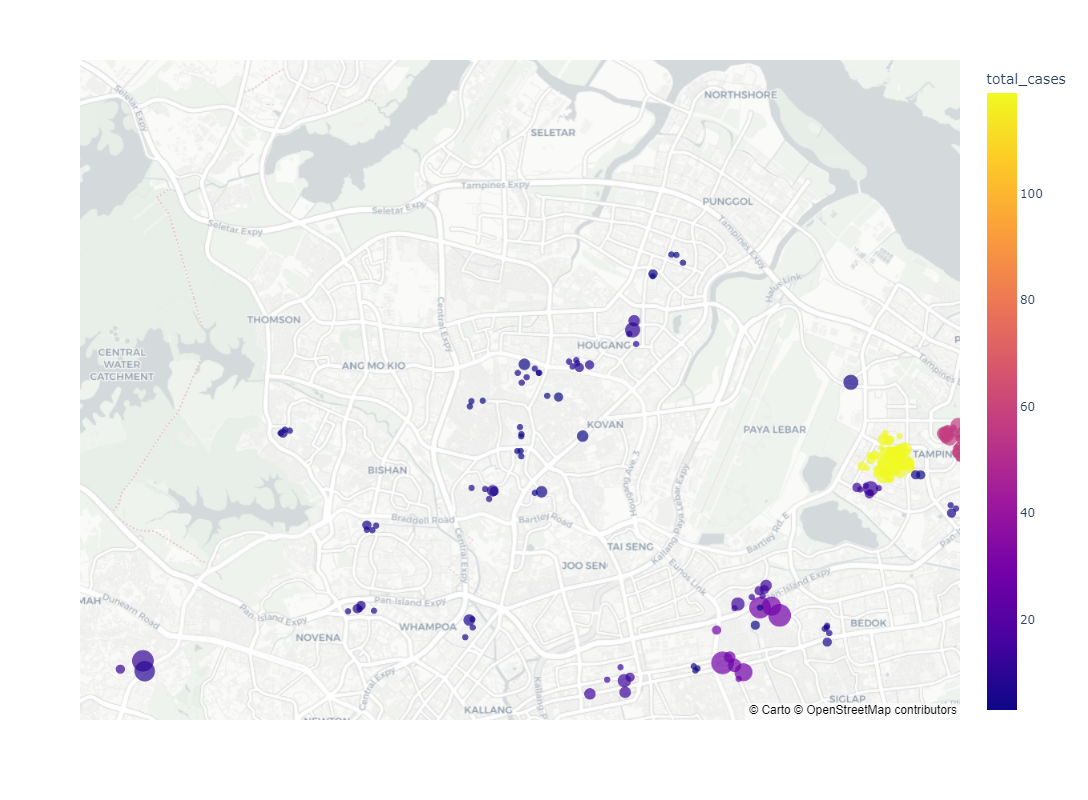

In [19]:
fig = px.scatter_mapbox(df_test, 
                        lat='latitude', 
                        lon='longitude', 
                        hover_data=['no_cases'],
                        color='total_cases',
                        mapbox_style='carto-positron',
                        size='no_cases',
                        zoom=12, 
                        height=800,
                        width=1200)
fig.show()